# Porter project

### **Introduction**

In the logistics and delivery industry, data plays a critical role in improving operational efficiency, optimizing delivery routes, and enhancing customer experience.
This project focuses on analyzing a Porter logistics dataset containing **197k+**records and multiple features related to orders, delivery partners, revenue, time, and order protocols.

### **Objective**

The primary objective of this analysis is to extract actionable insights from the data that can help businesses:

- Understand order and revenue trends

- Identify peak operational hours and customer behavior patterns

- Evaluate performance across markets and order protocols

- Recommend strategies to improve efficiency and customer satisfaction

### **Tools & Technique**

Languages & Libraries: Python, Pandas, NumPy, Matplotlib, Seaborn

Techniques: Data Cleaning,Missing value handling, EDA, Feature Engineering, Outlier handling

Deliverables: Insight Report and Business Recommendations

### **Project Overview**

Through this analysis, we explore how various operational factors such as **order protocol, time of day, market region, and order size** impact both delivery performance and revenue generation.
The insights derived from this project can help logistics companies make **data-driven strategic decisions** that improve efficiency, reduce delivery time, and enhance customer satisfaction.

# Data Structure and Overview

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
data=pd.read_csv(r"D:\tarang_sir_pdfs\data\porter dataset.csv")

In [122]:
df=data.copy()

In [123]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [124]:
df.shape

(197428, 14)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [126]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


In [127]:
df.isna().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [128]:
df.duplicated().sum()

np.int64(0)

In [129]:
df['market_id'].value_counts()

market_id
2.0    55058
4.0    47599
1.0    38037
3.0    23297
5.0    18000
6.0    14450
Name: count, dtype: int64

In [130]:
df['order_protocol'].value_counts()

order_protocol
1.0    54725
3.0    53199
5.0    44290
2.0    24052
4.0    19354
6.0      794
7.0       19
Name: count, dtype: int64

In [131]:
df['store_primary_category'].value_counts()

store_primary_category
american             19399
pizza                17321
mexican              17099
burger               10958
sandwich             10060
                     ...  
lebanese                 9
indonesian               2
belgian                  2
chocolate                1
alcohol-plus-food        1
Name: count, Length: 74, dtype: int64

# Datetime Features

In [132]:
df.head(1)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0


In [133]:
df['created_at']=pd.to_datetime(df['created_at'])

In [134]:
df['actual_delivery_time']=pd.to_datetime(df['actual_delivery_time'])

In [135]:
df['day']=df['created_at'].dt.strftime('%a')

In [136]:
df['month']=df['created_at'].dt.strftime('%b')

In [137]:
df['week_of_month'] = df['created_at'].apply(lambda d: (d.day - 1) // 7 + 1)

In [138]:
df['order_hour']=df['created_at'].dt.hour

In [139]:
df['ordr_yr']=df['created_at'].dt.year

In [140]:
df['day'].value_counts()

day
Sat    34541
Sun    33620
Fri    27875
Mon    27403
Thu    25673
Wed    24254
Tue    24062
Name: count, dtype: int64

**order r higher in week end**

In [141]:
df['ordr_yr'].value_counts()

ordr_yr
2015    197427
2014         1
Name: count, dtype: int64

In [142]:
df['month'].value_counts()

month
Feb    128945
Jan     68482
Oct         1
Name: count, dtype: int64

In [143]:

df['deliver_time']=df['actual_delivery_time']-df['created_at']

In [144]:
df['avlability_of_dlvry_prtnr']=df['total_busy_partners']/df['total_onshift_partners']

# EDA

## Univariate

#### Top 10 most popular food category among customers

In [145]:
df['store_primary_category'].value_counts(normalize=True).mul(100).head(10)

store_primary_category
american    10.068615
pizza        8.990076
mexican      8.874852
burger       5.687504
sandwich     5.221417
chinese      4.889759
japanese     4.772977
dessert      4.553429
fast         3.826271
indian       3.796168
Name: proportion, dtype: float64

#### Top 10 categories are responsible for 55% ordrers

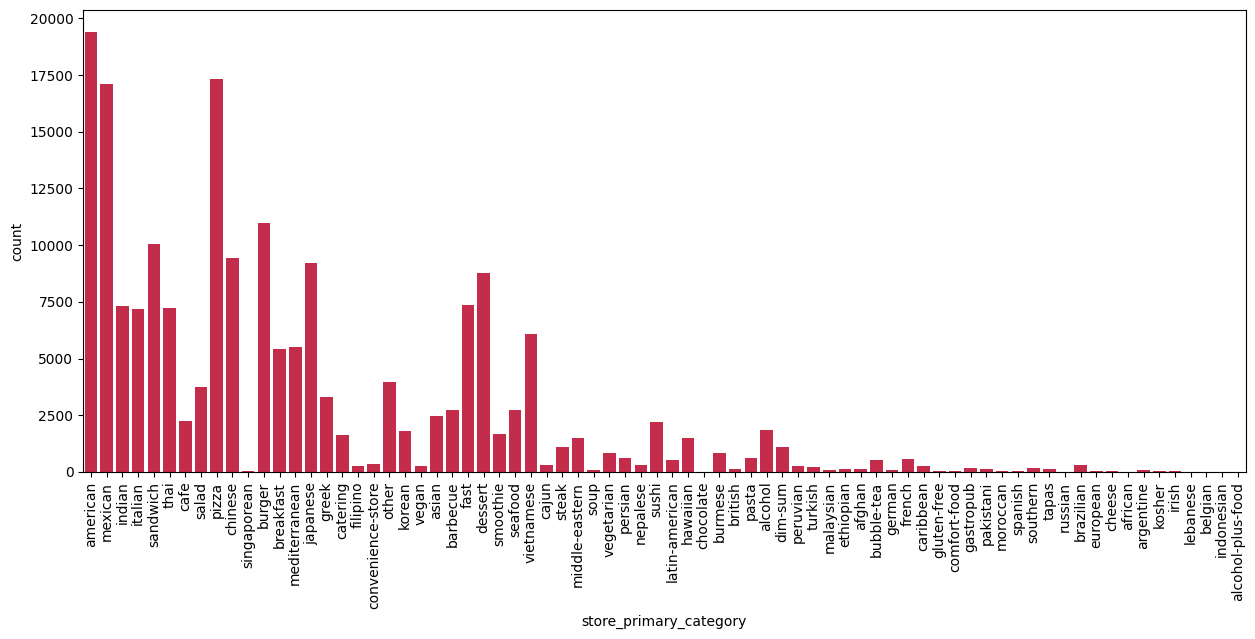

In [146]:

plt.figure(figsize=(15,6))
sns.countplot(data=df,x='store_primary_category',color='crimson')
plt.xticks(rotation=90)
plt.show()

#### order protocal count

In [147]:
df['order_protocol'].value_counts(normalize=True)

order_protocol
1.0    0.278594
3.0    0.270825
5.0    0.225471
2.0    0.122444
4.0    0.098527
6.0    0.004042
7.0    0.000097
Name: proportion, dtype: float64

<Axes: xlabel='order_protocol', ylabel='count'>

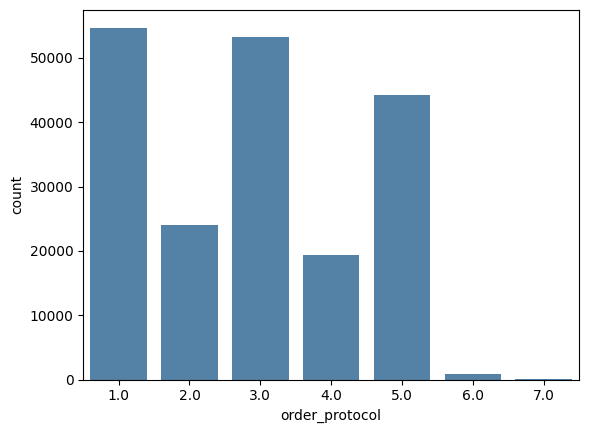

In [148]:
sns.countplot(data=df,x='order_protocol',color='steelblue')

#### **1,3 and 5 are the most popular protocal, 75% orders are placed through it**

#### distribution of total_items

In [149]:
df['total_items'].value_counts(normalize=True).mul(100).head(10)

total_items
2     27.926130
1     20.574083
3     19.882185
4     12.732743
5      7.119051
6      4.365136
7      2.544219
8      1.544867
9      0.942622
10     0.650364
Name: proportion, dtype: float64

#### **order size of ~ 95% people are equal or below 10**

<Axes: xlabel='total_items'>

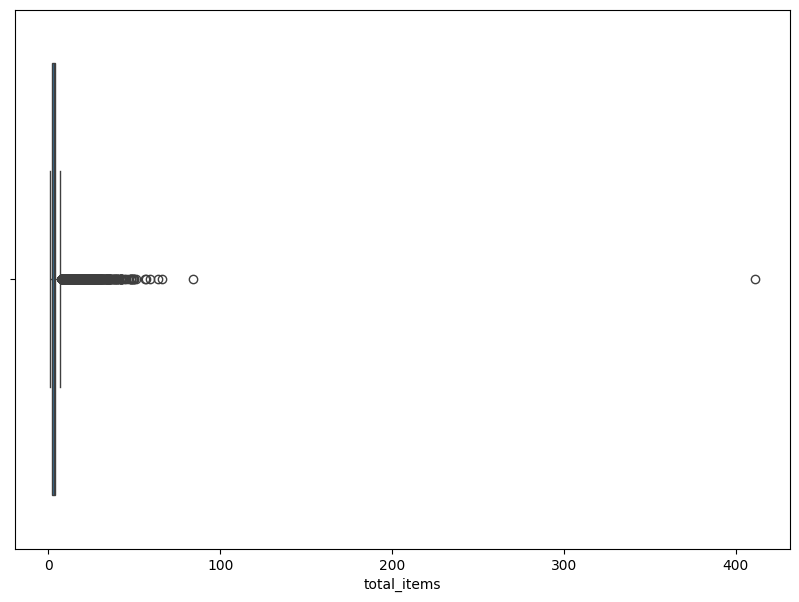

In [150]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='total_items')


#### distribution of subtotal

<Axes: xlabel='subtotal'>

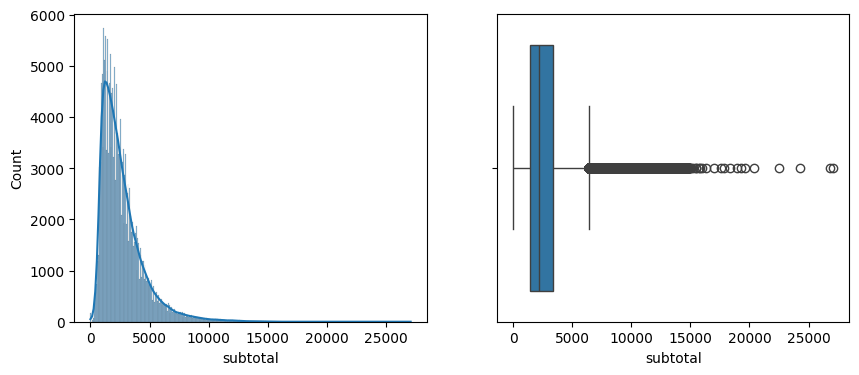

In [151]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data=df,x='subtotal',kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='subtotal')

In [152]:
df['num_distinct_items'].value_counts(normalize=True).mul(100)

num_distinct_items
2     29.972446
1     25.244140
3     21.194056
4     11.743522
5      5.962680
6      2.885102
7      1.477501
8      0.718743
9      0.371781
10     0.197034
11     0.118018
12     0.053184
13     0.030391
14     0.017728
15     0.006585
16     0.003039
18     0.001520
17     0.001013
19     0.001013
20     0.000507
Name: proportion, dtype: float64

#### **75% people are ordering <=3 distinct item**

#### distribution of min_item_price

<Axes: xlabel='min_item_price'>

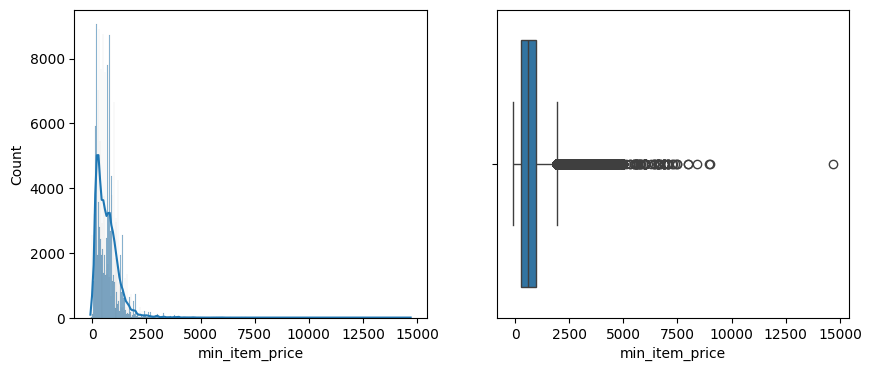

In [153]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data=df,x='min_item_price',kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='min_item_price')

#### distribution of max_item_price

<Axes: xlabel='max_item_price'>

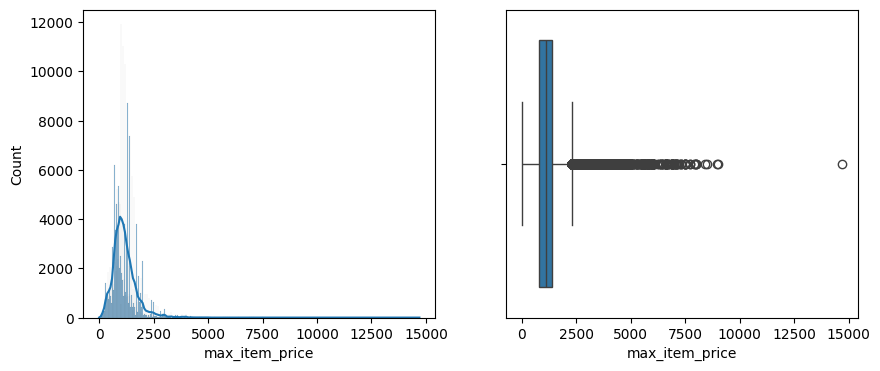

In [154]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data=df,x='max_item_price',kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='max_item_price')

#### Orders by Week of month

Text(0, 0.5, 'order count')

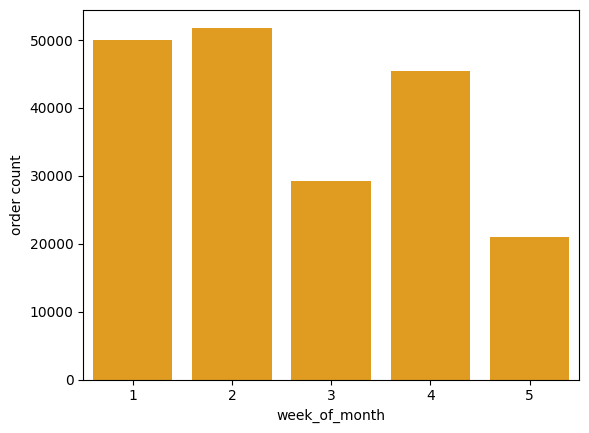

In [155]:
sns.countplot(data=df,x='week_of_month',color='orange')
plt.ylabel('order count')

 #### **3rd week of month has low order volume as compared to other week**

In [156]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'day', 'month', 'week_of_month',
       'order_hour', 'ordr_yr', 'deliver_time', 'avlability_of_dlvry_prtnr'],
      dtype='object')

In [157]:
df['order_hour'].value_counts()

order_hour
2     36976
1     28190
3     27068
20    15560
4     15250
19    13541
0     12669
21    11465
22     8821
23     8163
5      7096
18     5100
17     3413
16     2109
6      1416
15      538
14       40
7        11
8         2
Name: count, dtype: int64

Text(0, 0.5, 'order count')

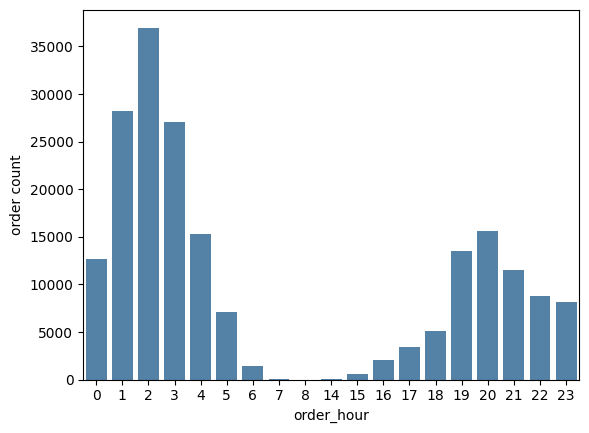

In [158]:
sns.countplot(data=df,x='order_hour',color='steelblue')
plt.ylabel('order count')

####  **highest number of orders placed between 12pm-4pm**

## Bi-variate analysis

#### Most revenue generating protocal

In [159]:
df.groupby('order_protocol')['subtotal'].sum().sort_values(ascending=False)

order_protocol
3.0    153263441
1.0    152955549
5.0    119711277
2.0     64444809
4.0     34787143
6.0      1681307
7.0        57265
Name: subtotal, dtype: int64

In [160]:
df.groupby('order_protocol')['total_items'].sum().sort_values(ascending=False)

order_protocol
3.0    170527
1.0    169897
5.0    132503
4.0     77317
2.0     75660
6.0      1987
7.0        56
Name: total_items, dtype: int64

#### **3,1 and 5 are the top order protocal w.r.t revenue and volume**

#### Market generating most revenue

In [161]:
df.groupby('market_id')['subtotal'].sum().sort_values(ascending=False)

market_id
2.0    144942546
4.0    137864105
1.0    104388238
3.0     60005499
5.0     43414753
6.0     36312653
Name: subtotal, dtype: int64

#### **Market id 2,4,1 are generationg most revenue**

#### Top selling categories by revenue

In [162]:
df.groupby('store_primary_category')['subtotal'].sum().sort_values(ascending=False).head(10)

store_primary_category
pizza       52092237
american    51572367
mexican     39251042
japanese    30905690
chinese     27021933
italian     26874120
burger      24277803
thai        22455499
dessert     21381785
indian      21264973
Name: subtotal, dtype: int64

In [163]:
df.groupby('day')['subtotal'].sum().sort_values(ascending=False).head(10)

day
Sat    96861354
Sun    94130217
Mon    74146410
Fri    72851473
Thu    66619562
Wed    62937061
Tue    62021247
Name: subtotal, dtype: int64

#### **revenue are high in weekends(90+ lakh )**

In [164]:
rev_by_hr=df.groupby('order_hour')['subtotal'].sum().sort_values(ascending=False).head(10)
rev_by_hr

order_hour
2     114623696
1      91224952
3      75193491
4      38698130
0      36441461
20     35113549
19     34333061
21     24686768
22     18926016
23     18451308
Name: subtotal, dtype: int64

<Axes: xlabel='order_hour', ylabel='subtotal'>

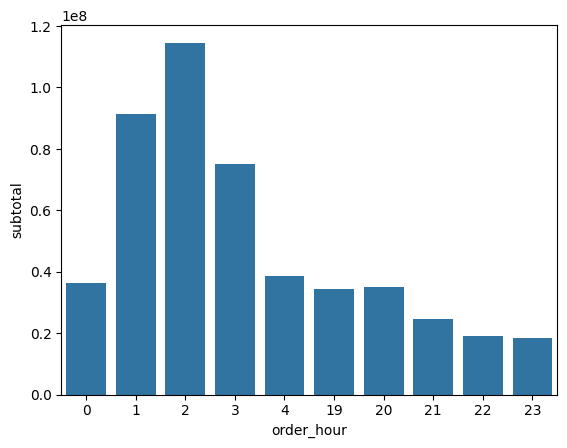

In [165]:
sns.barplot(data=rev_by_hr)

In [181]:

df['deliver_time_hours'] = df['deliver_time'].dt.total_seconds() / 60


In [182]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'day', 'month', 'week_of_month',
       'order_hour', 'ordr_yr', 'deliver_time', 'avlability_of_dlvry_prtnr',
       'deliver_time_hours'],
      dtype='object')

#### Average delivery time  per market

In [183]:
df.groupby('market_id')['deliver_time_hours'].median().sort_values(ascending=False).round(2)

market_id
1.0    46.90
4.0    44.42
3.0    44.10
6.0    43.59
5.0    43.42
2.0    43.35
Name: deliver_time_hours, dtype: float64

In [184]:
df.groupby('order_protocol')['deliver_time_hours'].median().sort_values(ascending=False).round(2)

order_protocol
6.0    56.78
1.0    46.50
4.0    44.32
2.0    44.12
3.0    43.77
5.0    42.43
7.0    36.17
Name: deliver_time_hours, dtype: float64

#### **Order protocal 7 has fastest delivery while Order protocal 6 has slowest delivery**

<Axes: xlabel='deliver_time_hours'>

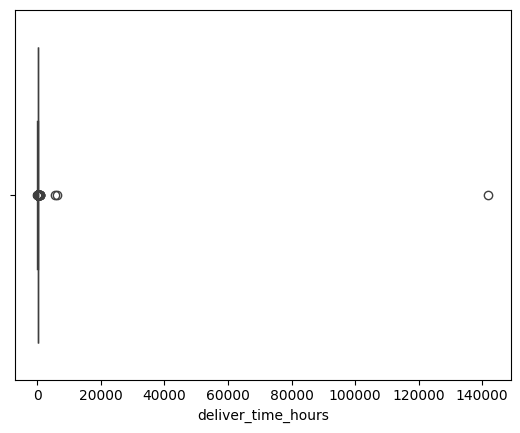

In [185]:
sns.boxplot(data=df,x='deliver_time_hours')

In [186]:
df.groupby('order_hour')['deliver_time_hours'].median().sort_values(ascending=False).round(2)

order_hour
8     3388.08
14      60.85
2       51.22
3       49.08
7       48.63
15      47.47
1       45.92
16      44.03
19      43.15
20      41.29
4       41.05
0       40.95
17      40.90
23      39.87
22      38.93
21      38.16
6       37.88
18      37.71
5       36.68
Name: deliver_time_hours, dtype: float64

In [ ]:
df.columns

#### Relationship between order size and delivery duration

In [179]:
df['total_items'].corr(df['deliver_time_hours'])

np.float64(0.004904767615867939)

<Axes: >

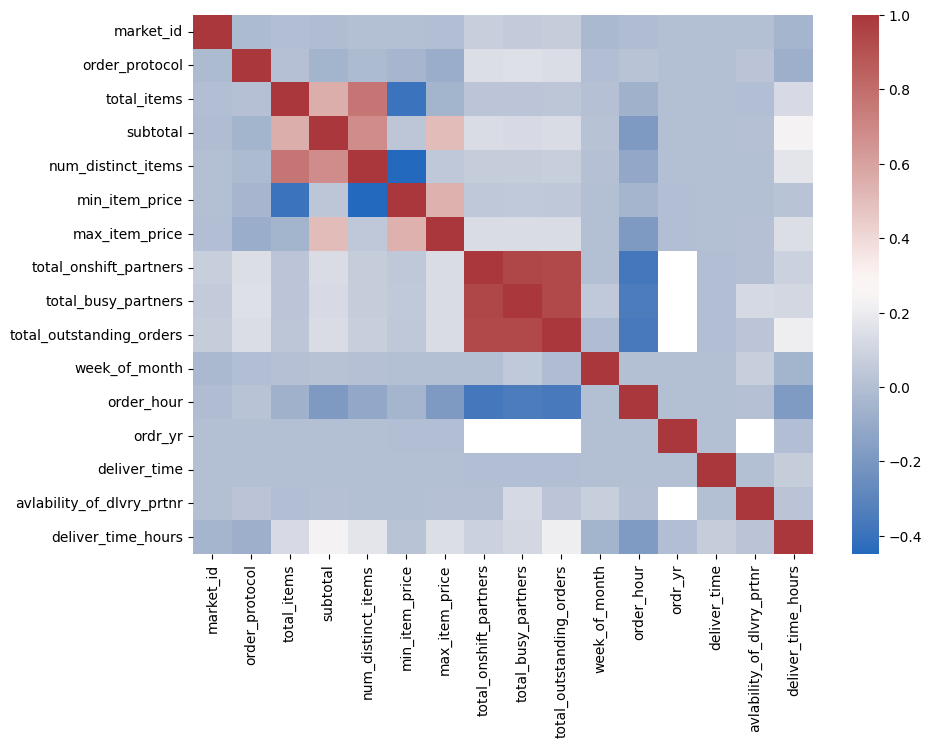

In [195]:

x=df.select_dtypes(include='number').corr()
plt.figure(figsize=(10,7))
sns.heatmap(x,cmap='vlag')

## Missing value handling

In [ ]:
df.head(2)

In [ ]:
df.isna().sum()

In [ ]:
df['market_id']=df['market_id'].fillna('unknown')

In [ ]:
df=df.dropna(subset=['actual_delivery_time'])

In [ ]:
df['store_primary_category'].value_counts()

In [ ]:
df.groupby('order_protocol')['store_primary_category'].apply(lambda x:x.isna().sum())

In [ ]:
df['store_primary_category']=df['store_primary_category'].fillna('unknown')

In [ ]:
df.head()

In [ ]:
df['order_protocol'].value_counts()

In [ ]:
df.groupby('market_id')['order_protocol'].apply(lambda x:x.isna().sum())

In [ ]:
df['order_protocol']=df['order_protocol'].fillna('unknown')

In [ ]:
df['total_onshift_partners']=df['total_onshift_partners'].fillna(df['total_onshift_partners'].median())

In [ ]:
df['total_busy_partners']=df['total_busy_partners'].fillna(df['total_onshift_partners'].median())

In [ ]:
df['total_outstanding_orders']=df['total_outstanding_orders'].fillna(df['total_onshift_partners'].median())

In [ ]:
df.isna().sum()

## 	Correlation Analysis

In [ ]:
df.head(1)

In [ ]:
df.columns

In [ ]:
col=['total_items','subtotal','min_item_price','max_item_price']
df[col].corr()

In [ ]:
df[col].corr(method='spearman')

In [ ]:
df.head(2)

In [ ]:
df.groupby('market_id')['subtotal'].sum()

## Outlier handling

In [187]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'day', 'month', 'week_of_month',
       'order_hour', 'ordr_yr', 'deliver_time', 'avlability_of_dlvry_prtnr',
       'deliver_time_hours'],
      dtype='object')

#### For subtotal

<Axes: xlabel='subtotal'>

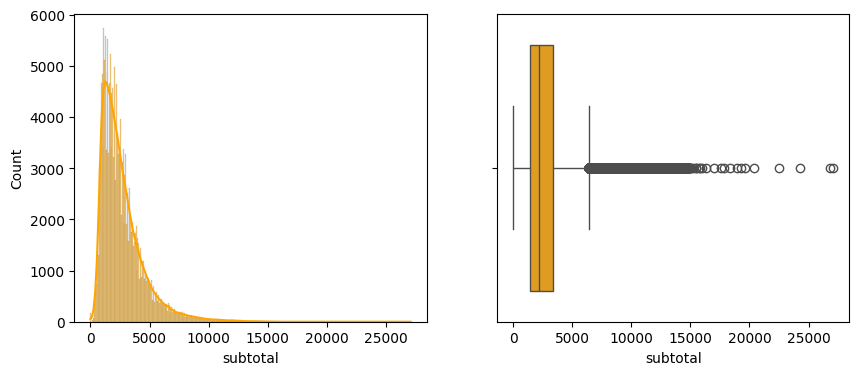

In [196]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data=df,x='subtotal',kde=True,color='orange')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='subtotal',color='orange')

In [ ]:
# using cap&floor

In [ ]:
Q1 = df['subtotal'].quantile(0.25)
Q3 = df['subtotal'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['subtotal'] = np.where(df['subtotal'] > upper, upper,
                             np.where(df['subtotal'] < lower, lower, df['subtotal']))


<Axes: xlabel='subtotal'>

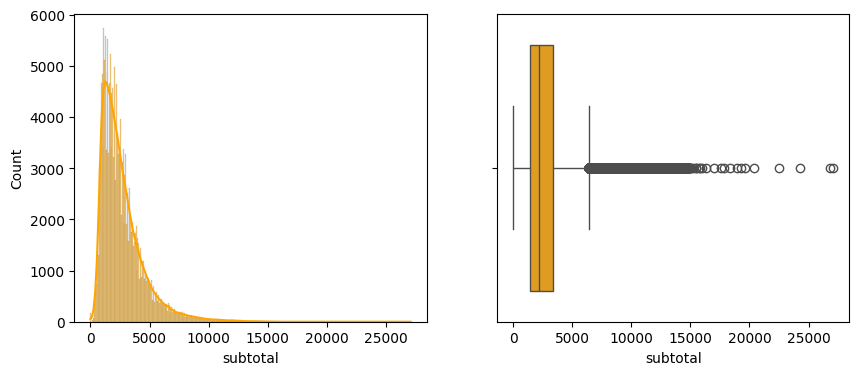

In [197]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data=df,x='subtotal',kde=True,color='orange')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='subtotal',color='orange')

#### for min_item_price

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data=df,x='min_item_price',kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='min_item_price')

In [ ]:
# using cap or floor

In [ ]:
Q1 = df['min_item_price'].quantile(0.25)
Q3 = df['min_item_price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR



In [ ]:
df['min_item_price'] = np.where(df['min_item_price'] > upper, upper,
                             np.where(df['min_item_price'] < lower, lower, df['min_item_price']))


<Axes: xlabel='min_item_price'>

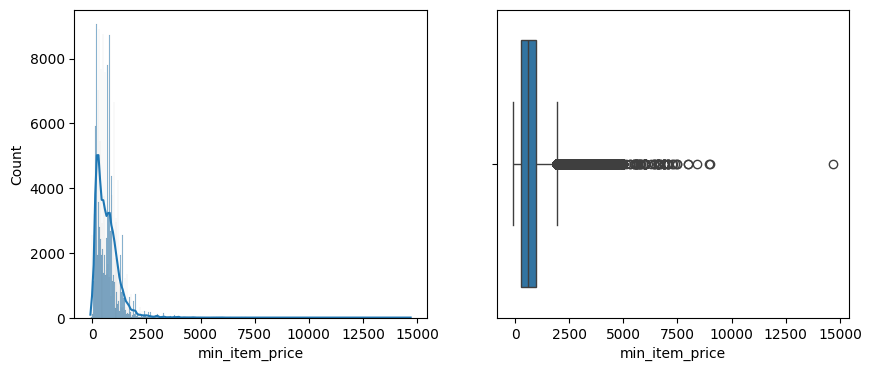

In [198]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data=df,x='min_item_price',kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='min_item_price')

#### for max_item_price

<Axes: xlabel='max_item_price'>

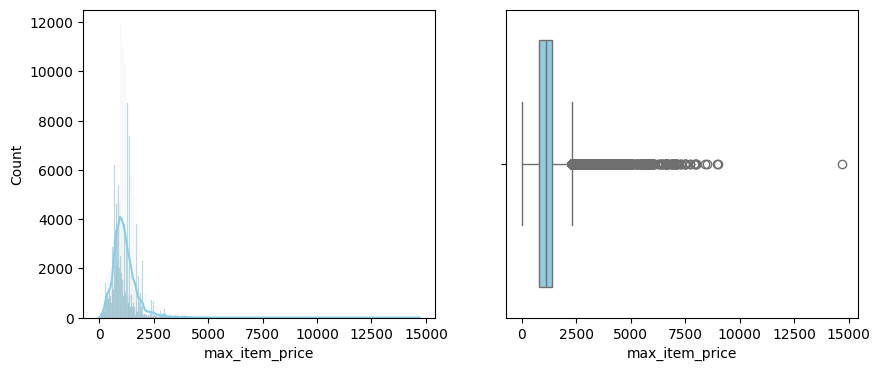

In [199]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data=df,x='max_item_price',kde=True,color='skyblue')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='max_item_price',color='skyblue')

In [ ]:
# cap& floor

In [ ]:
Q1 = df['max_item_price'].quantile(0.25)
Q3 = df['max_item_price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['max_item_price'] = np.where(df['max_item_price'] > upper, upper,
                             np.where(df['max_item_price'] < lower, lower, df['max_item_price']))


In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data=df,x='max_item_price',kde=True,color='skyblue')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='max_item_price',color='skyblue')

#### no. of distinct item

In [ ]:
Q1 = df['num_distinct_items'].quantile(0.25)
Q3 = df['num_distinct_items'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['num_distinct_items'] = np.where(df['num_distinct_items'] > upper, upper,
                             np.where(df['num_distinct_items'] < lower, lower, df['num_distinct_items']))

<Axes: xlabel='num_distinct_items'>

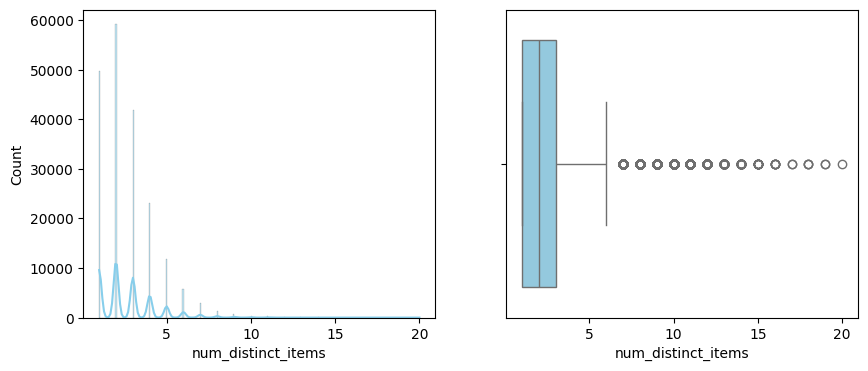

In [200]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data=df,x='num_distinct_items',kde=True,color='skyblue')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='num_distinct_items',color='skyblue')

#### delivery time hour

In [188]:
Q1 = df['deliver_time_hours'].quantile(0.25)
Q3 = df['deliver_time_hours'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['deliver_time_hours'] = np.where(df['deliver_time_hours'] > upper, upper,
                             np.where(df['deliver_time_hours'] < lower, lower, df['deliver_time_hours']))

<Axes: xlabel='deliver_time_hours'>

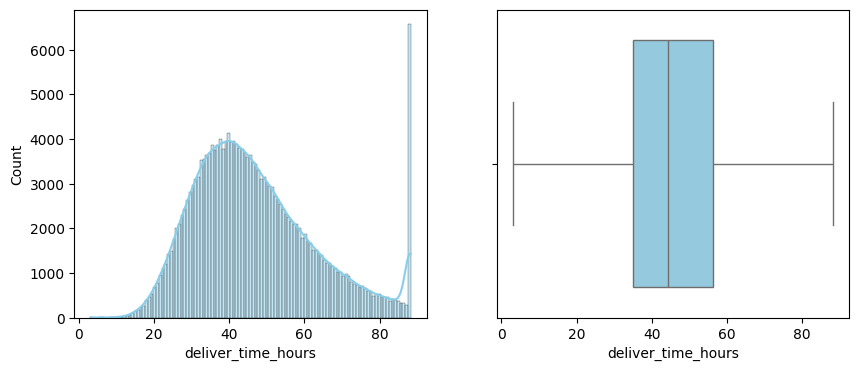

In [189]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data=df,x='deliver_time_hours',kde=True,color='skyblue')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='deliver_time_hours',color='skyblue')

In [ ]:
#	Use advanced visualization techniques (e.g., heatmaps, pair plots) to explore relationships between multiple variables simultaneously.
 # How do interactions between categorical variables (e.g., store_primary_category * order_protocol) affect the delivery time?


In [ ]:

x=df.select_dtypes(include='number').corr()
plt.figure(figsize=(12,9))
sns.heatmap(x,annot= True,cmap='vlag')

# **Insight and recomendation**

### **Key Insights**

- **Demand & Revenue Patterns:**	Order volume and revenue peak during weekends, crossing ₹90 lakh, indicating strong weekend demand.
  
- **Category Performance:**	The Top 10 store categories drive 55% of total orders, suggesting a concentration of demand in limited segments.
- **Ordering Behavior:**	Around 95% of customers order ≤10 items, and 75% order ≤3 distinct items, indicating predominantly small, frequent orders.
- **Time-Based Trends:**	12 PM – 4 PM shows the highest order traffic, aligning with lunch-time and afternoon peaks. The 3rd week of the month has comparatively low activity.
- **Protocol Performance:**	Protocols 1, 3, and 5 account for ~75% of all orders and top 3 revenue share, while Protocol 7 delivers the fastest average delivery time and Protocol 6 is the slowest.
- **Market Analysis:**	Market IDs 2, 4, and 1 generate the majority of total revenue, indicating higher customer engagement or operational scale in these regions.

### **Business Recommendations**
   
- **Resource Planning:** 
   - Increase on-shift partner count during weekends and 12 PM–4 PM to meet peak demand 
without compromising delivery speed. 
   - Run promotional campaigns during the 3rd week of the month to balance demand cycles. 
- **Category Strategy:** 
   - Strengthen relationships with Top 10 high-volume categories, introduce loyalty or bundle 
offers to retain this core segment. 
- **Protocol Optimization:** 
   - Analyze operational processes behind Protocol 7’s fast deliveries and standardize them across 
other protocols. 
  -  Investigate delays in Protocol 6 and redesign workflows or partner routing logic. 
- **Market Expansion:** 
   -  Benchmark performance of Markets 2, 4, and 1, replicate their strategies (pricing, availability, 
logistics) in lower-performing markets.